# LCPB 20-21 exercise 4

### Saverio Monaco

### Gerardo Carmona

### Hilario Capettini

In [1]:
#!pip install plotly #to install the interactive plots library (not mandatory)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys

from sklearn.manifold import TSNE
from itertools import cycle, islice

try:
    import plotly.express as px
    import plotly.graph_objects as go
except:
    print('Interactive plots not supported')

Interactive plots not supported


In [3]:
def cl_scatter3d_static(xdata,ydata,title = False):
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                                    int(max(ydata) + 1))))
    fig, (ax1) = plt.subplots(figsize=(10, 10))
    ax1 = plt.axes(projection='3d')
    ax1.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax1.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax1.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax1.set_yticklabels([])
    ax1.set_xticklabels([])
    ax1.set_zticklabels([])
    #ax1.view_init(view1, view2)
    if title:
        ax1.set_title(title)
    ax1.scatter3D(xdata[:,0], xdata[:,1], xdata[:,2],color=colors[y]);
    
def cl_scatter3d_interactive(xdata,ydata,size=2,title=False):
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                                     int(max(ydata) + 1))))
    fig = go.Figure(data=[go.Scatter3d(x=data[:,0], y=data[:,1], z=data[:,2],
                                       mode='markers', marker=dict(color=colors[ydata],size=size))])
    if title:
        fig.update_layout(title=title)
    fig.show()

# more general function, it checks if the interactive plots library is installed, if so it will show
# the interactive plot, if not it will use matplotlib library
def cl_scatter3d(xdata,ydata,size=2,title=False):
    if('plotly' in sys.modules):
        cl_scatter3d_interactive(xdata,ydata,size,title)
    else:
        cl_scatter3d_static(xdata,ydata,title)

In [4]:
data = np.loadtxt('./DATA/data_t-SNE_310101_d5_R100_e1_N800.dat',delimiter='\t')
data_size = np.shape(data)[0]

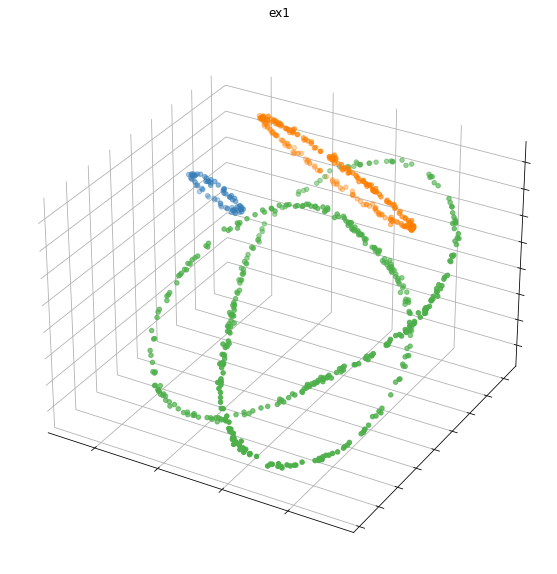

In [5]:
y = []
for i in range(int(data_size/10)):
    y.append(0)

for i in range(int(data_size*3/10)):
    y.append(1)

for i in range(int(data_size*6/10)):
    y.append(2)
cl_scatter3d(data,y,title='ex1')

## 2

class sklearn.manifold.TSNE(n_components=2, *, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0, random_state=None, method='barnes_hut', angle=0.5, n_jobs=None, square_distances='legacy')

In [6]:
def tsne_2(x,perplexity):
    X = TSNE(n_components=2,perplexity=perplexity).fit_transform(x)
    X.shape
    return X

Text(0.5, 1.0, 'Perplexity = 100')

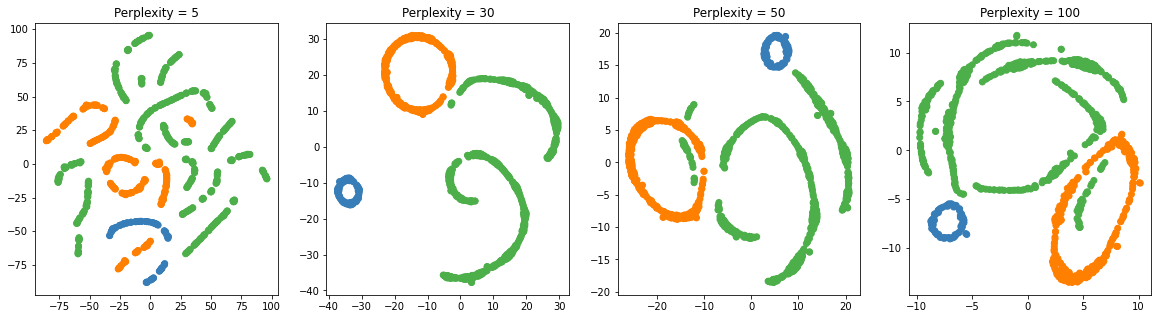

In [7]:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                                    int(max(y) + 1))))

fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

x = tsne_2(data,5)
ax1.scatter(x[:,[0]],x[:,[1]],color=colors[y])
ax1.set_title('Perplexity = 5')

x = tsne_2(data,30)
ax2.scatter(x[:,[0]],x[:,[1]],color=colors[y])
ax2.set_title('Perplexity = 30')

x = tsne_2(data,50)
ax3.scatter(x[:,[0]],x[:,[1]],color=colors[y])
ax3.set_title('Perplexity = 50')

x = tsne_2(data,100)
ax4.scatter(x[:,[0]],x[:,[1]],color=colors[y])
ax4.set_title('Perplexity = 100')



## 3. From NB15 extract the part concerning the DBSCAN algorithm for clustering and embed it in the notebook to analyze the clustering in d=5 dimensions to generate predicted labels, then plot the results. Something like the next figure should arise. It includes a grid with several values of “eps” and “minPts”.
## To understand a good range for the cutoffs “eps” in DBSCAN, sort all minimum distances to first neighbors and plot them.


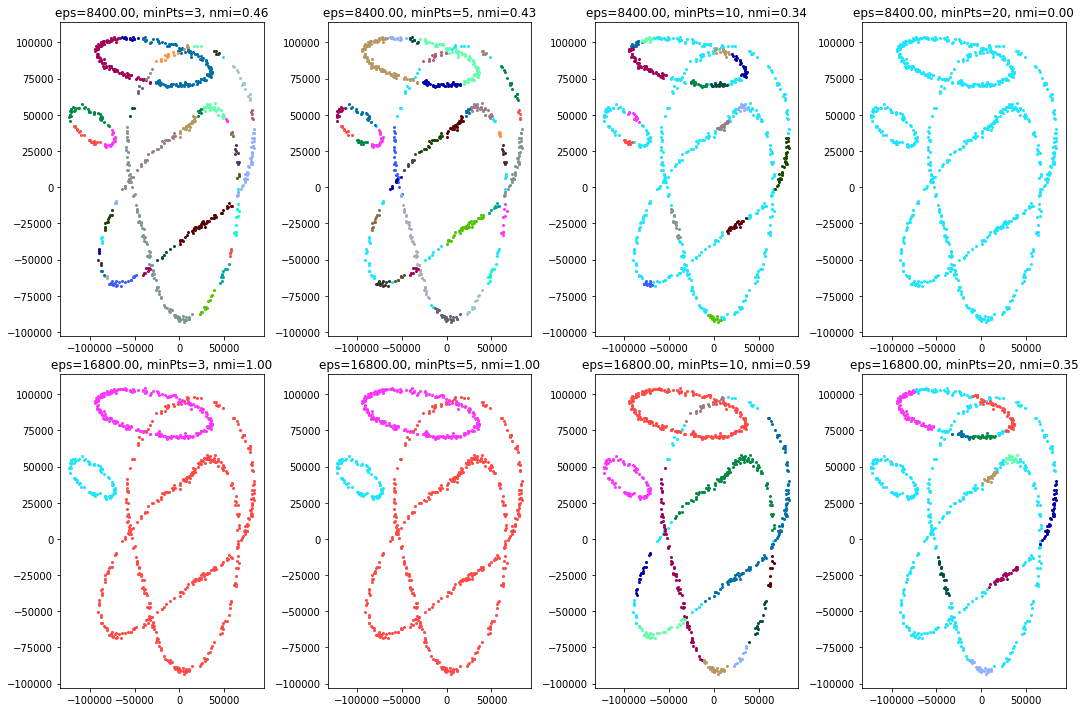

In [29]:
from collections import OrderedDict
cpalette = ["#1CE6FF", "#FF34FF", "#FF4A46","#008941", "#006FA6", "#A30059", "#0000A6", "#63FFAC","#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693","#1B4400", "#4FC601", "#3B5DFF", "#4A3B53","#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C","#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F"]
def clustering(y):
    # Finds position of labels and returns a dictionary of cluster labels to data indices.
    yu = np.sort(np.unique(y))
    clustering = OrderedDict()
    for ye in yu:
        clustering[ye] = np.where(y == ye)[0]
    return clustering

def entropy(c, n_sample):
    # Measures the entropy of a cluster
    h = 0.
    for kc in c.keys():
        p=len(c[kc])/n_sample
        h+=p*np.log(p)
    h*=-1.
    return h

def NMI(y_true, y_pred):
    """ Computes normalized mutual information: where y_true and y_pred are both clustering assignments
    """
    w = clustering(y_true)
    c = clustering(y_pred)
    n_sample = len(y_true)

    Iwc = 0.
    for kw in w.keys():
        for kc in c.keys():
            w_intersect_c=len(set(w[kw]).intersection(set(c[kc])))
            if w_intersect_c > 0:
                Iwc += w_intersect_c*np.log(n_sample*w_intersect_c/(len(w[kw])*len(c[kc])))
    Iwc/=n_sample
    Hc = entropy(c,n_sample)
    Hw = entropy(w,n_sample)

    return 2*Iwc/(Hc+Hw)


from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

def plotting_ax(X, y, ax):
    # plotting function
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)
        ax.scatter(X[pos,0], X[pos,1],c=cpalette[i%len(cpalette)],s=4)

# DBSCAN has a few parameters, let's sweep over a few parameters and see what happens
np.random.seed(0)
n_true_center=len(np.unique(y))
X = StandardScaler().fit_transform(data)

eps_range = [8400, 16800]
min_sample_range = [3,5,10,20]
fig, ax = plt.subplots(len(eps_range),len(min_sample_range),figsize=(15,10))
for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_sample_range):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(data)
        _y = model.labels_
        plotting_ax(data,_y,ax[i,j])
        nmi=NMI(_y, y)
        ax[i,j].set_title('eps=%.2f, minPts=%i, nmi=%.2f'%(eps,min_samples,nmi))
plt.tight_layout(h_pad=0.5)
plt.show()